In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
df=pd.read_csv("/Users/ayeshaqureshi/Downloads/Employee.csv")

Basic Analyzations

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

In [5]:
df.info() #dtaatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.describe() #statisticaln values summission

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
df.isna() #null values

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4648,False,False,False,False,False,False,False,False,False
4649,False,False,False,False,False,False,False,False,False
4650,False,False,False,False,False,False,False,False,False
4651,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum() #sum of null values

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df.duplicated().sum()  #sum of duplicated values

1889

In [10]:
df.drop_duplicates(inplace=True) #dropping the duplicates

In [11]:
df.shape

(2764, 9)

Checking Unique Values in each Feature

In [12]:
df["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [13]:
df["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [14]:
df["JoiningYear"].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018])

In [15]:
df["PaymentTier"].unique()

array([3, 1, 2])

In [16]:
df["Age"].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41])

In [17]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df["ExperienceInCurrentDomain"].unique()

array([0, 3, 2, 5, 1, 4, 7, 6])

In [19]:
df["EverBenched"].unique()

array(['No', 'Yes'], dtype=object)

Univariate Analysis

0    1676
1    1088
Name: LeaveOrNot, dtype: int64


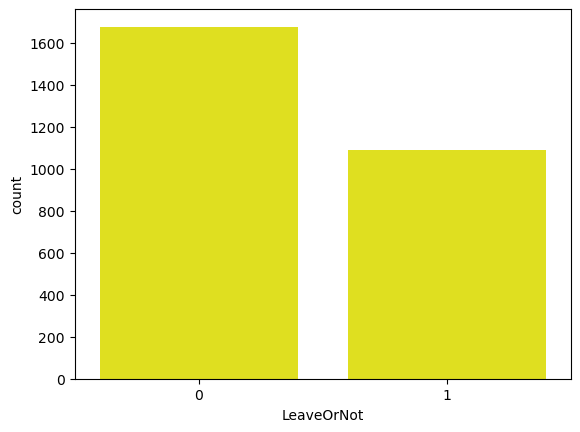

In [20]:
print(df["LeaveOrNot"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["LeaveOrNot"], color="yellow")
plt.show()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64


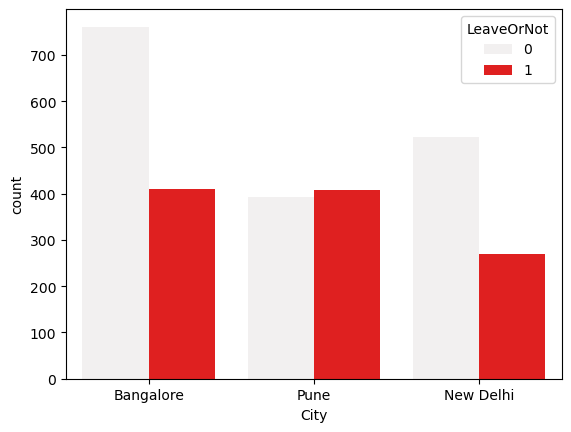

In [21]:
print(df["City"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["City"],hue="LeaveOrNot" ,color="red")
plt.show()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64


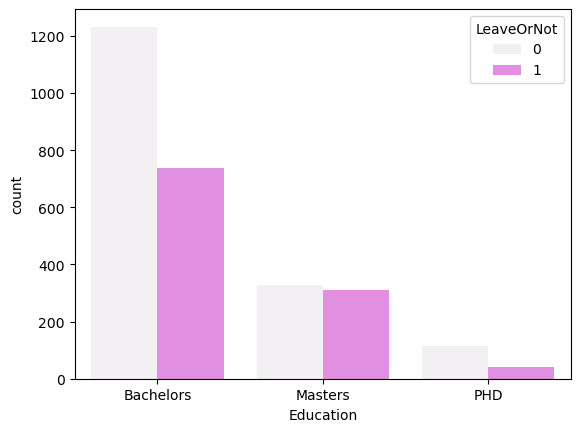

In [22]:
print(df["Education"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["Education"],hue="LeaveOrNot", color="Violet")
plt.show()

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64


<Axes: xlabel='JoiningYear', ylabel='Count'>

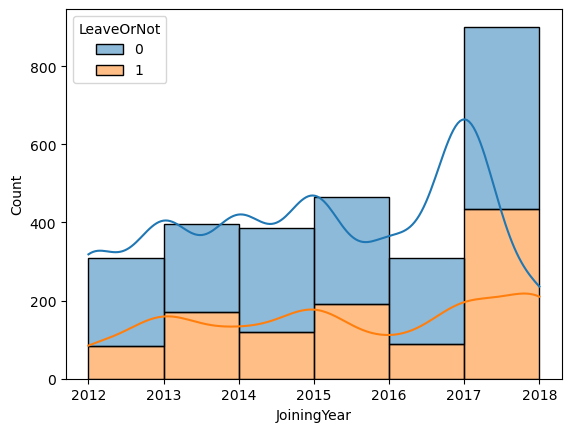

In [23]:
print(df["JoiningYear"].value_counts())
sns.histplot(data=df, x=df["JoiningYear"],hue="LeaveOrNot", kde=True, bins=6, multiple="stack", color="Indigo")

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64


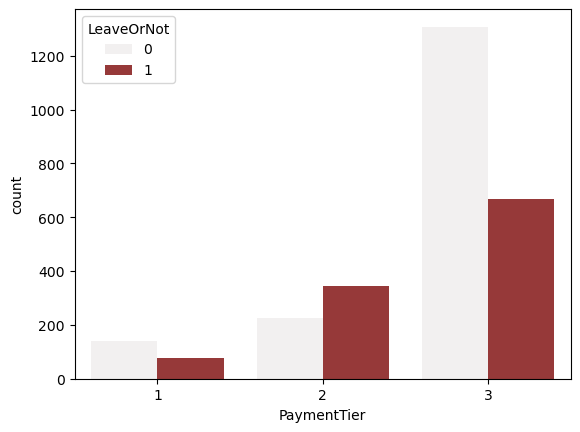

In [24]:
print(df["PaymentTier"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["PaymentTier"],hue="LeaveOrNot", color="Brown")
plt.show()

28    365
27    218
30    186
29    180
26    179
25    167
24    161
36    121
40    119
37    119
34    118
38    117
39    115
31    115
33    114
32    113
35    110
41     75
23     41
22     31
Name: Age, dtype: int64


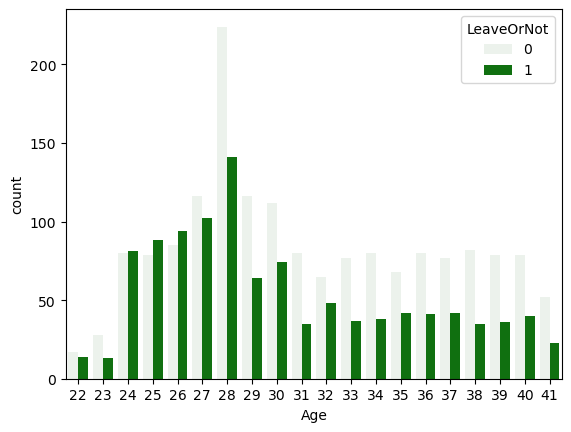

In [25]:
print(df["Age"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["Age"],hue="LeaveOrNot", color="Green")
plt.show()

Male      1529
Female    1235
Name: Gender, dtype: int64


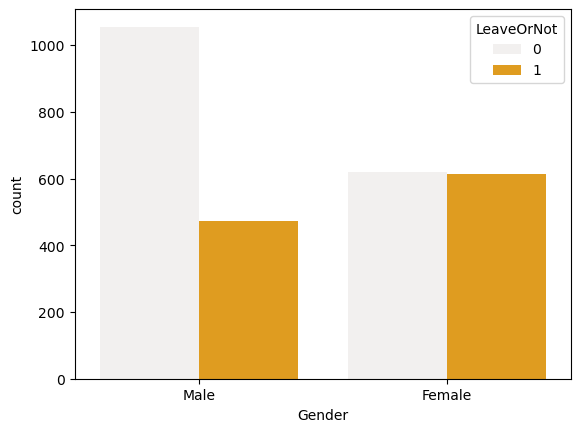

In [26]:
print(df["Gender"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["Gender"],hue="LeaveOrNot", color="Orange")
plt.show()

2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: ExperienceInCurrentDomain, dtype: int64


<Axes: xlabel='ExperienceInCurrentDomain', ylabel='Count'>

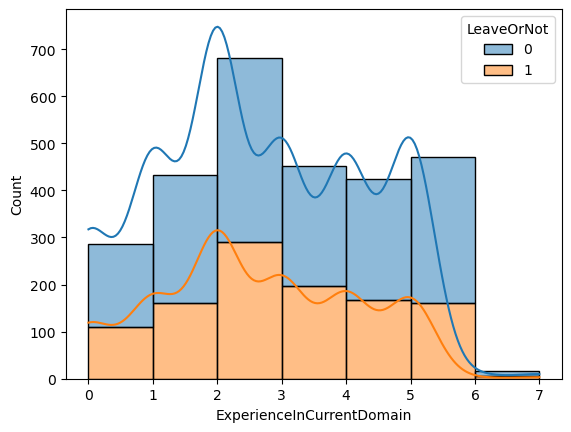

In [27]:
print(df["ExperienceInCurrentDomain"].value_counts())
sns.histplot(data=df, x=df["ExperienceInCurrentDomain"], hue="LeaveOrNot",color="Beige", kde=True, bins=7, multiple="stack")

No     2403
Yes     361
Name: EverBenched, dtype: int64


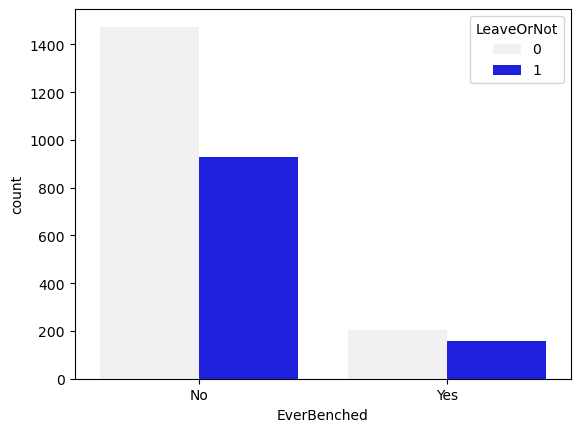

In [28]:
print(df["EverBenched"].value_counts())
plt.figure()
sns.countplot(data=df, x=df["EverBenched"],hue="LeaveOrNot",  color="Blue")
plt.show()

Bivariate Analysis Include- label Encoding for Categorical Columns

In [29]:
le=LabelEncoder()
df["Education"]=le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])

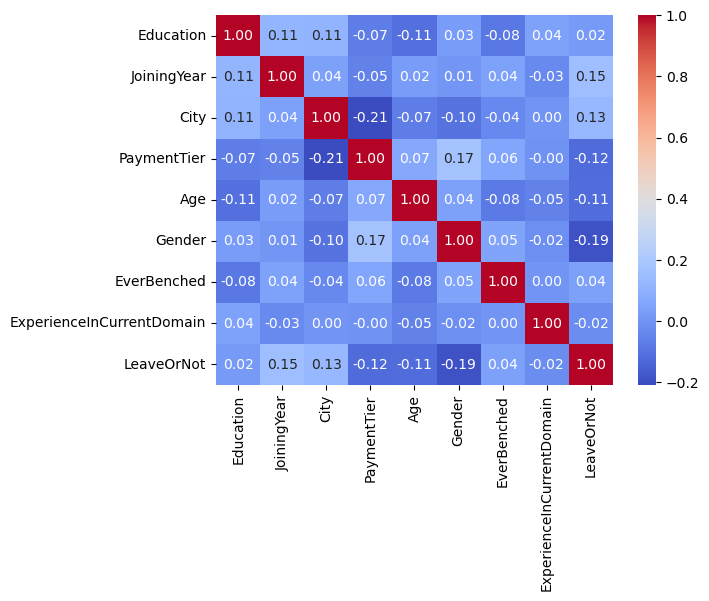

<Axes: >

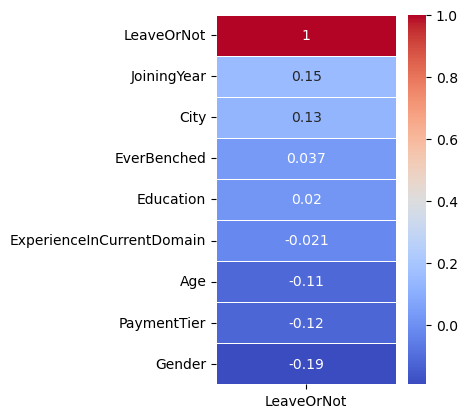

In [30]:
correlation_matrix = df.corr()
plt.figure()
sns.heatmap(df.corr(), cmap="coolwarm", fmt=".2f", annot=True)
plt.show()
plt.subplot(1,2,2)
sns.heatmap(correlation_matrix[['LeaveOrNot']].sort_values(by='LeaveOrNot', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)

Splitting the dataset

In [31]:
# Print columns before dropping
print("Columns before dropping target:", df.columns)

# Check columns after dropping
X = df.drop(["LeaveOrNot"], axis=1)
y = df["LeaveOrNot"]

print("Columns after dropping target:", X.columns)

# Perform the split again and check shapes
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42, 
    test_size=0.3
)

# Display shapes to confirm
print("Shapes after split:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Columns before dropping target: Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')
Columns after dropping target: Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain'],
      dtype='object')
Shapes after split:
x_train shape: (1934, 8)
x_test shape: (830, 8)
y_train shape: (1934,)
y_test shape: (830,)


In [32]:
x_train, x_test, y_train, y_test=  train_test_split(X,y, random_state=42, test_size=0.3)

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1934, 8), (1934,), (830, 8), (830,))

Using Smote Oversampling Technique

In [34]:
sm=SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(x_train, y_train)

In [35]:
x_train_smote.shape, y_train_smote.shape

((2354, 8), (2354,))

Logistic Regression

In [36]:
log_reg= LogisticRegression()
log_reg.fit(x_train_smote, y_train_smote) #train
y_pred=log_reg.predict(x_test) #test
accuracy= accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report= classification_report(y_test, y_pred)

In [37]:
print(f"Accuracy:{accuracy: .2f}")
print("Confusion Matrix:")
print (conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.62
Confusion Matrix:
[[324 175]
 [143 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       499
           1       0.52      0.57      0.54       331

    accuracy                           0.62       830
   macro avg       0.61      0.61      0.61       830
weighted avg       0.62      0.62      0.62       830



Random Forest Classifier

In [39]:
rf= RandomForestClassifier()
hyper_params = {"max_features" : [1,3,10], #controls the maximum number of features that the random forest considers when splitting a node.
                "min_samples_split" : [2,3,10], #controls the minimum number of samples required to split an internal node.
               "min_samples_leaf" : [1,3,10], #sets the minimum number of samples required to be at a leaf node.
               "n_estimators" : [100,200,300,400,500], #defines the number of trees in the forest.
               "criterion" : ["gini"]} #defines the function to measure the quality of a split. In this case
#using gridsearch to optimize the random forest model.
model= GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro")
model.fit(x_train_smote, y_train_smote)
y_pred=model.predict(x_test)
print(model.best_estimator_)

accuracy= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
precision_scores= precision_score(y_test, y_pred)
recall_scores= recall_score(y_pred, y_test)

print(f"Accuracy:{accuracy: .2f}")
print(f"f1:{f1: .2f}")
print(f"precision Score:{precision_scores: .2f}")
print(f"Recall:{recall_scores: .2f}")

RandomForestClassifier(max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=500)
Accuracy: 0.77
f1: 0.69
precision Score: 0.74
Recall: 0.74
